In [11]:
%matplotlib inline
%config InlineBackend.print_figure_kwargs = {'dpi':200, 'bbox_inches': 'tight'}
# The previous configuration allows larger inline figures in Jupyter without changing output figure size.
# This is useful to keep figures at a consistent size for publishing.

In [12]:
import numpy as np
import matplotlib.pyplot as plt

from matplotlib_latex_configurations import *
from network_of_oscillators_Kuramoto_model import *
from network_of_oscillators_integrate_and_sync_quantifiers import *
from network_of_oscillators_plot_utils import *

In [13]:
# Reading natural frequencies of vertices w and edges of the coupling graph E, and setting the kuramotoModel.

w=np.loadtxt('parameters/N0011_C001.Freq')
E=np.loadtxt('parameters/N0011_ER002_001.Net')
kuramotoModel=KuramotoModel(w, E, c = 0.5)

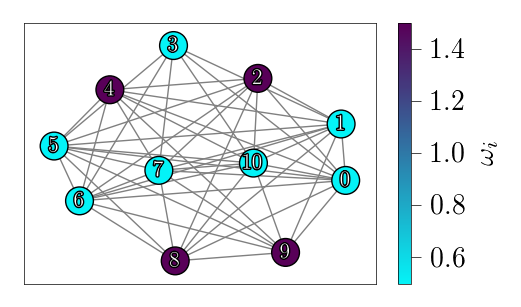

In [14]:
fig, ax = plt.subplots(figsize=(one_column_figure_size * golden_ration,one_column_figure_size))
plot_coupling_graph(E, w, ax)
plt.tight_layout()
# plt.savefig("tex_example\\graph.pdf")

In [14]:
theta0=np.loadtxt('parameters/N0011_R001.Ic')
out=integrate_and_measure(kuramotoModel, theta0, tf=200)
print(out['mean_r'], out['partial_sync'])
t, theta, r, psi = unpack_print(out)

0.694741449203 0.748694099349


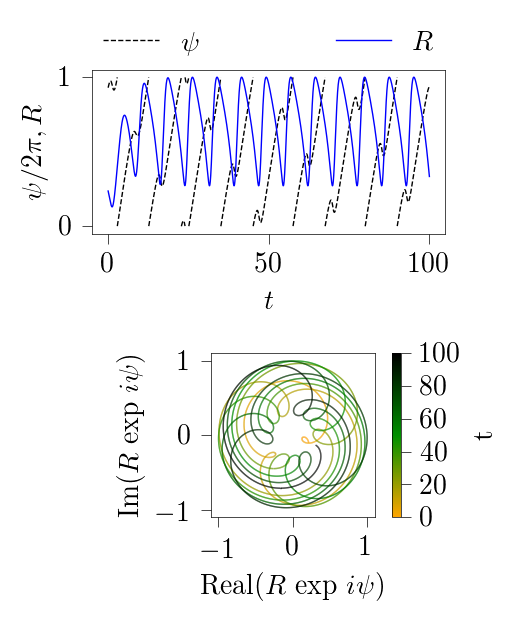

In [30]:
fig, ((ax1, ax2)) = plt.subplots(2, 1, figsize=( 2.75, 3))

tlim = [0, 100]
plot_r_psi(t, r, psi, tlim = tlim, ax=ax1)
legend = ax1.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., frameon=False)

plot_r_exp_psi(t, r, psi, tlim = tlim, ax=ax2)

plt.tight_layout()

# plt.savefig("tex_example\\orderParameter.pdf")

In [ ]:
# plot_phase_minus_psi(t, theta, psi)
# plot_phase_minus_psi_histogram(theta, psi)

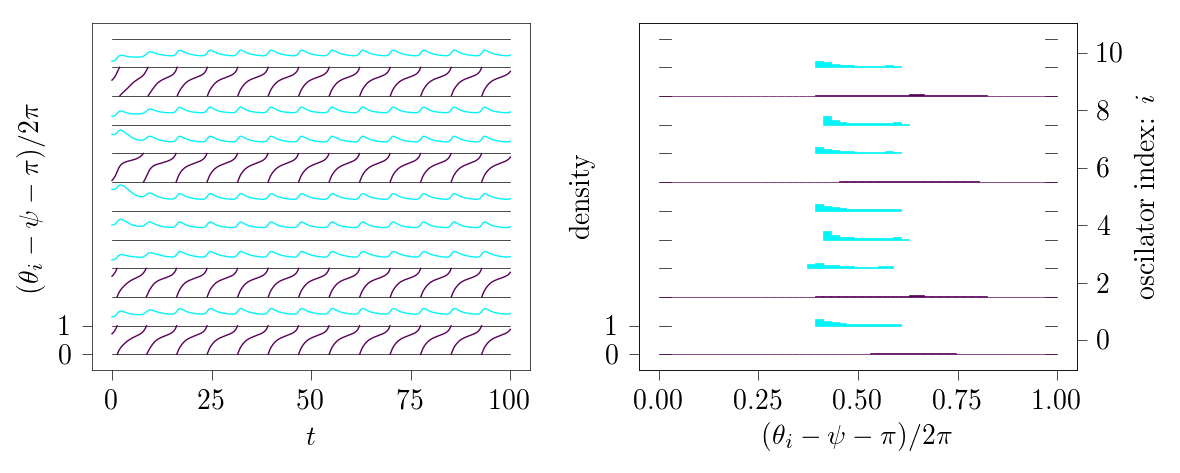

In [29]:
fig, ((ax1, ax2)) = plt.subplots(1, 2, figsize=(6,2.5))
# sel = [0, 2, 6, 9, 3, 4]

plot_phase_minus_psi(t, theta, psi, tlim = [0,100],
                    color = frequency_to_color(w),
#                     sel = sel,
                    shift_axis = True,
                    show_right_ax_labels = False,
                    ax = ax1)

plot_phase_minus_psi_histogram(theta, psi,
                    color = frequency_to_color(w),
#                     sel = sel,
                    shift_axis = True,
                    ax = ax2)

plt.tight_layout()
# plt.savefig("tex_example\\phaseVariables.pdf")

In [21]:
#Increasing coupling parameter
out = {}
for kuramotoModel.c in arange_(0,1,0.1):
    out[kuramotoModel.c] = integrate_and_measure(kuramotoModel, theta0, tf=200)

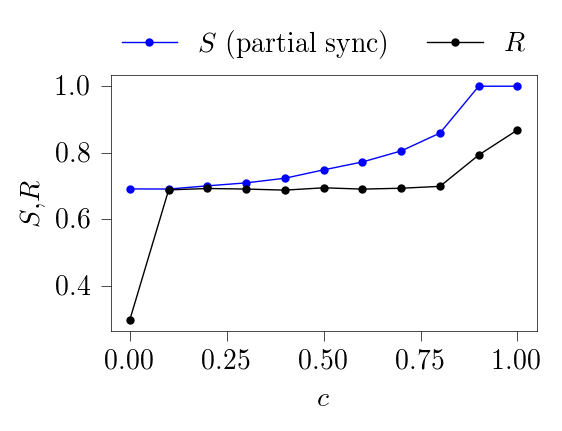

In [33]:
cs, partial_sync, mean_r = zip(*[ [c,  out[c]['partial_sync'],  out[c]['mean_r']] for c in out.keys()])
fig, ax = plt.subplots(1, figsize=( one_column_figure_size * golden_ration,one_column_figure_size))
ax.plot(cs,partial_sync, '-bo',  markersize=2, label=r'$S$ (partial sync)', linewidth = 0.5)
ax.plot(cs,mean_r, '-ko', markersize=2, label=r'$R$', linewidth = 0.5)
ax.set_xlabel(r'$c$')
ax.set_ylabel(r'$S$,$R$')
legend = ax.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=2, mode="expand", borderaxespad=0., frameon=False)

plt.savefig("tex_example\\increasingC.pdf")